# Тестирование загрузки модели и работы с ней

In [1]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from cv2 import imread, cvtColor, resize
from cv2 import COLOR_BGR2RGB

# Yolo model path
import sys
sys.path.append("../yolov5")
from models.common import AutoShape
from models.yolo import Model

In [10]:
%matplotlib inline

## Загрузка модели

Загрузим модель

In [3]:
def model_load(path_weight, autoshape=True):
    try:
        model = torch.load(path_weight)['model']  # load model
        model = model.float() # weight to float
        if autoshape:
            model = AutoShape(model)  # for file/URI/PIL/cv2/np inputs and NMS
    except Exception as e:
        s = f'{e}. Check if the file exists and if the "model" is present in the file'
        raise Exception(s) from e
        
    return model

In [4]:
model = model_load("../data/weights/best.pt")

Adding AutoShape... 


## Совершение предсказания

Загрузка изображения

In [30]:
imgs = ['https://ultralytics.com/images/zidane.jpg']

Проверка правильности работы модели

In [31]:
predict = model(imgs)

image 1/1: 720x1280 2 without masks
Speed: 1674.4ms pre-process, 136.5ms inference, 56.8ms NMS per image at shape (1, 3, 384, 640)


,xmin,ymin,xmax,ymax,confidence,class,name
0,906.781555,123.006805,1057.165894,288.922211,0.890054,0,without mask
1,538.779907,290.386475,658.544922,439.286865,0.745244,0,without mask


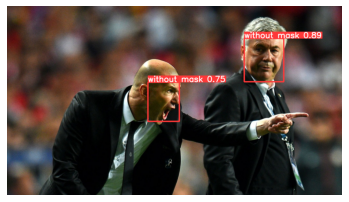

In [33]:
# Results
predict.print()
plt.axis('off')
plt.imshow(predict.render()[0])  # or .show()

# results.xyxy[0] # img1 predictions (tensor)
predict.pandas().xyxy[0]  # img1 predictions (pandas)